In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
one_hot = OneHotEncoder()

In [4]:
path = 'C:/Users/LJ/ML codes/titanic'

In [5]:
train_data = pd.read_csv(path + '/train.csv')
test_data = pd.read_csv(path + '/test.csv')

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [10]:
# plt.figure(figsize=(10,6))

# train_data[train_data['Sex']=='male']['Survived'].hist(bins=35,color='blue',label='male survived',alpha=0.6)
# train_data[train_data['Sex']=='female']['Survived'].hist(bins=35,color='red',label='female survived',alpha=0.6)

# plt.legend()
# plt.xlabel('Sex')

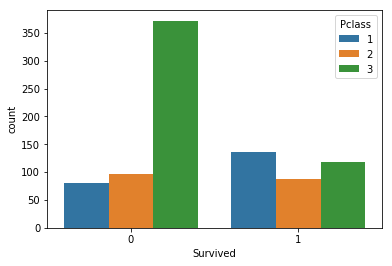

In [11]:
sns.countplot(x='Survived',data=train_data,hue='Pclass')

In [12]:
corr = train_data.corr()

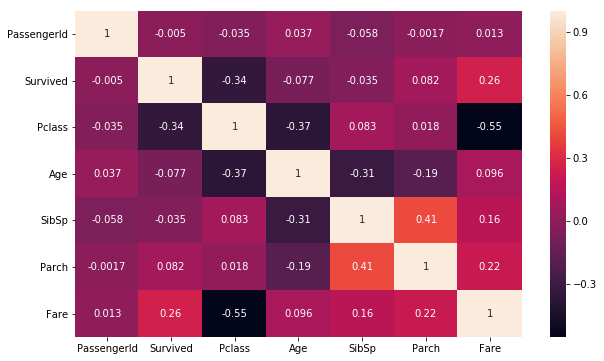

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

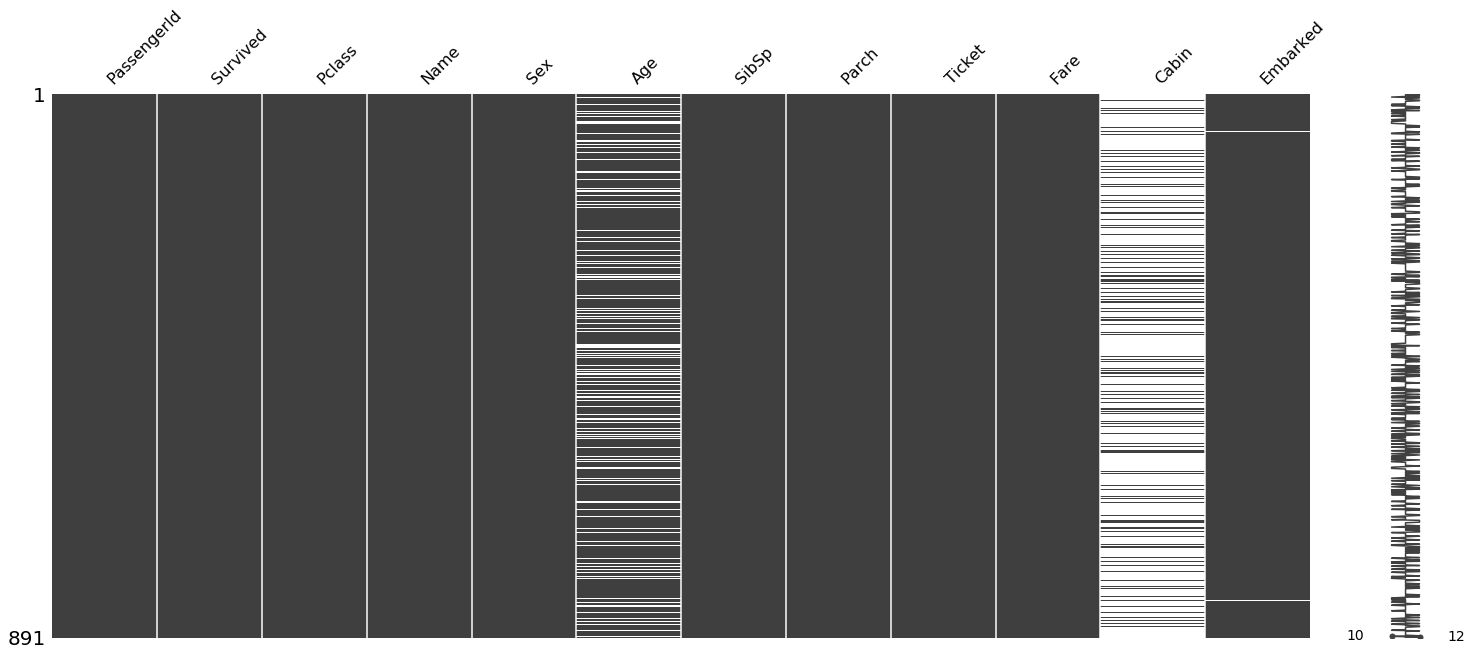

In [14]:
missingno.matrix(train_data)

In [15]:
train_data['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [16]:
age_fill = train_data['Age'].mean()

In [17]:
train_data['Age'] = train_data.Age.fillna(age_fill)

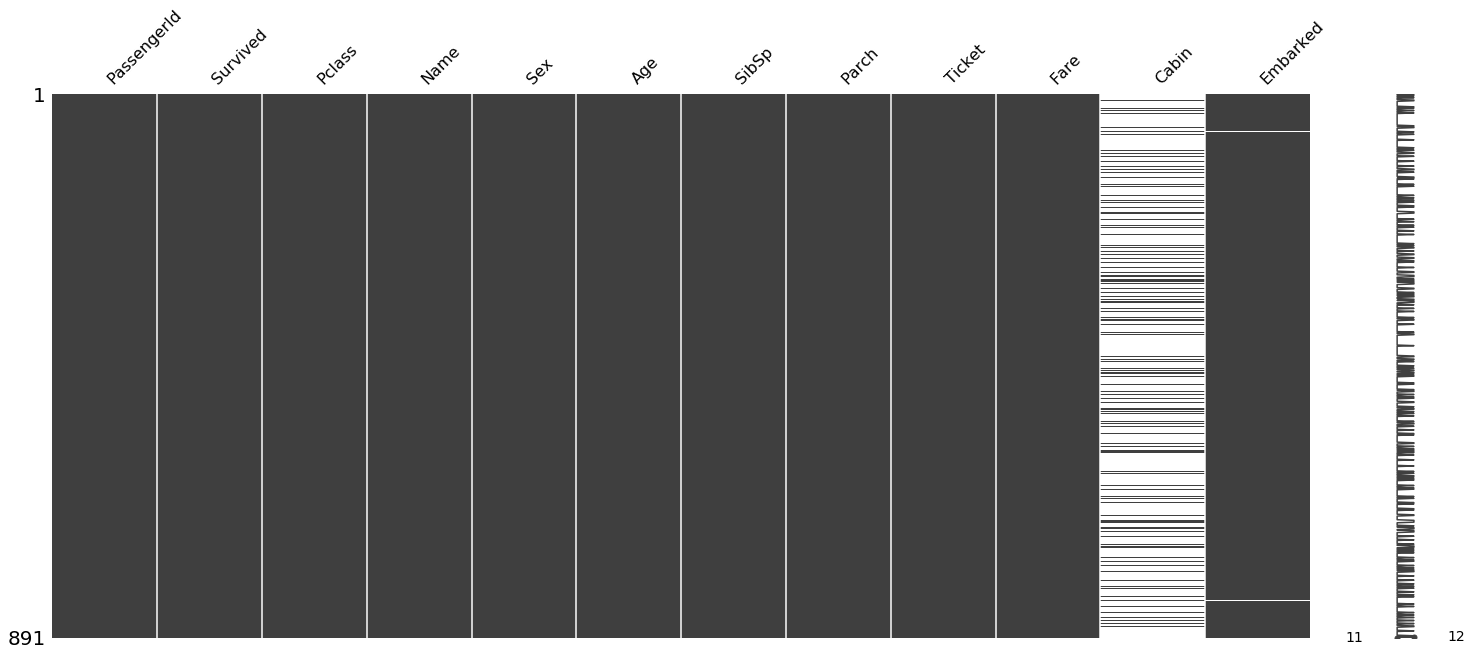

In [18]:
missingno.matrix(train_data)

In [19]:
def missing_values(df,columns):
    
    missing_vals = {}
    
    df_length = len(train_data)
    
    for column in columns:
        
        total_column_values = df[column].value_counts().sum()
        
        missing_vals[column] = df_length - total_column_values
        
    return missing_vals
        


In [20]:
missing_vals = missing_values(train_data,train_data.columns)

In [21]:
missing_vals

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 0,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [22]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


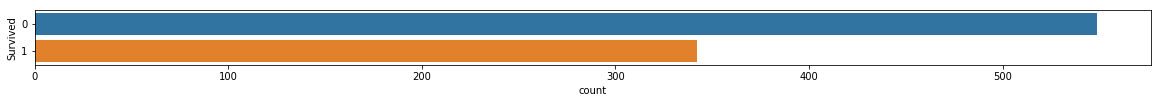

In [23]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train_data);
print(train_data.Survived.value_counts())

In [24]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame()

In [25]:
df_bin['Survived'] = train_data['Survived']
df_con['Survived'] = train_data['Survived']

In [26]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


C:\Users\LJ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


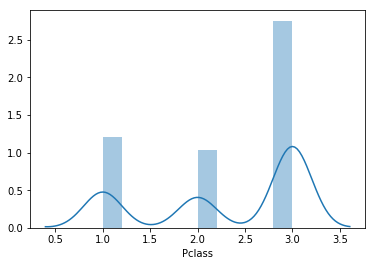

In [27]:
sns.distplot(train_data.Pclass)

In [28]:
df_bin['Pclass'] = train_data['Pclass']
df_con['Pclass'] = train_data['Pclass']

# Feature: Name
Description: The name of the passenger.

In [29]:
train_data.Name.value_counts()

Palsson, Miss. Stina Viola                                                            1
Harris, Mrs. Henry Birkhardt (Irene Wallach)                                          1
Lefebre, Miss. Mathilde                                                               1
Kink, Mr. Vincenz                                                                     1
Christmann, Mr. Emil                                                                  1
Moran, Miss. Bertha                                                                   1
Padro y Manent, Mr. Julian                                                            1
Barbara, Miss. Saiide                                                                 1
Dimic, Mr. Jovan                                                                      1
Ekstrom, Mr. Johan                                                                    1
Hart, Mr. Henry                                                                       1
Jonsson, Mr. Carl               

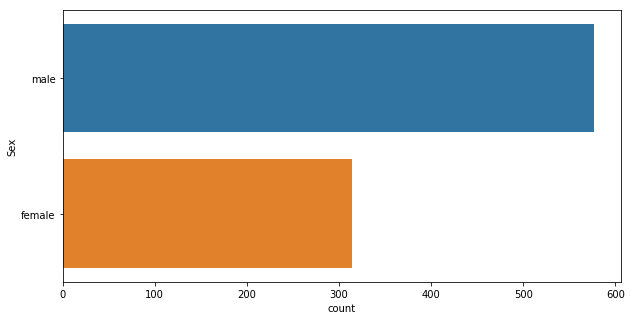

In [30]:
# Let's view the distribution of Sex
plt.figure(figsize=(10, 5))
sns.countplot(y="Sex", data=train_data);

In [31]:
# from imblearn.over_sampling import SMOTE 

In [32]:
# sm = SMOTE(random_state=42)

In [33]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# one_hot_train = one_hot_train.drop(['Survived'])

In [35]:
# one_hot_train['Survived']

In [36]:
# one_hot_train_target = one_hot_train['Survived']

In [37]:
# sm.fit(one_hot_train,one_hot_test)

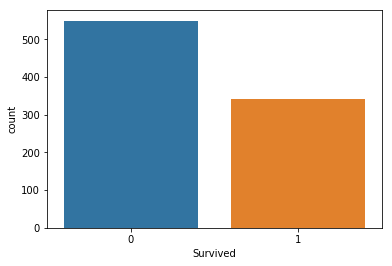

In [38]:
sns.countplot(train_data['Survived'])

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature-Engineering

In [40]:
train_data['Name'].tail()

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [41]:
import re

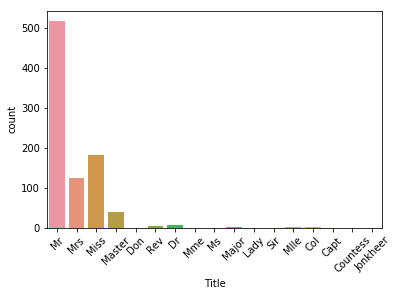

In [42]:
train_data['Title'] = train_data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=train_data);
plt.xticks(rotation=45);

# Title column added to dataset for more information

 Title will give us information on social status, profession, etc., which in the end could tell us something more about survival

In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [44]:
train_data['Title'] = train_data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})

train_data['Title'] = train_data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')

In [45]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S,Special
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q,Mr


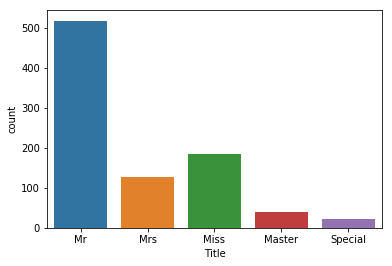

In [46]:
sns.countplot(x='Title', data=train_data);

In [47]:
# Did they have a Cabin?
train_data['Has_Cabin'] = train_data.Cabin.isnull()       #is null will return True if the value is null or nan
                                                          #and false if they have cabin

In [48]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,True


In [49]:
train_data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,0,3,male,22.0,1,0,7.2500,S,Mr,True
1,1,1,female,38.0,1,0,71.2833,C,Mrs,False
2,1,3,female,26.0,0,0,7.9250,S,Miss,True
3,1,1,female,35.0,1,0,53.1000,S,Mrs,False
4,0,3,male,35.0,0,0,8.0500,S,Mr,True


In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null object
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     889 non-null object
Title        891 non-null object
Has_Cabin    891 non-null bool
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [51]:
one_hot_train = pd.get_dummies(train_data)
one_hot_test = pd.get_dummies(test_data)

In [52]:
one_hot_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,0,3,22.0,1,0,7.2500,True,0,1,0,0,1,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,False,1,0,1,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,True,1,0,0,0,1,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,False,1,0,0,0,1,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,True,0,1,0,0,1,0,0,1,0,0


In [53]:
train_data['Has_Cabin'] = pd.get_dummies(train_data['Has_Cabin'])

In [66]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,0,3,male,22.0,1,0,7.2500,S,Mr,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,0


In [93]:
train_data['Sex'] = pd.get_dummies(train_data['Sex'])

In [101]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [103]:
train_data['Title'] = le.fit_transform(train_data['Title'])

In [115]:
train_data['Embarked']=train_data['Embarked'].fillna('S')

In [122]:
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])

In [123]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,0,3,1,22.0,1,0,7.2500,2,2,0
1,1,1,0,38.0,1,0,71.2833,0,3,1
2,1,3,0,26.0,0,0,7.9250,2,1,0
3,1,1,0,35.0,1,0,53.1000,2,3,1
4,0,3,1,35.0,0,0,8.0500,2,2,0


In [126]:
x = train_data.drop(['Survived'],axis=1)
y = train_data['Survived']

# Recursive Feature Elimination

In [80]:
from sklearn.feature_selection import RFECV

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
from sklearn.linear_model import LogisticRegression

In [128]:
rfe = RFECV(RandomForestClassifier(n_estimators=10), scoring='accuracy')

In [129]:
rfe.fit(x,y)

C:\Users\LJ\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RFECV(cv='warn',
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [132]:
rfe.score(x,y)

0.9708193041526375

In [140]:
log = RFECV(LogisticRegression(solver='lbfgs',max_iter=400), scoring='accuracy')

In [141]:
log.fit(x,y)

C:\Users\LJ\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RFECV(cv='warn',
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [142]:
log.score(x,y)

0.8047138047138047